<a href="https://colab.research.google.com/github/vinifarias/projeto-metodologia/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.stats import normaltest, ttest_ind, ttest_rel
pd.__version__

'1.1.5'

### Importação dos dados

Os dados coletados foram obtidos através da survey: **[Análise dos fatores motivacionais durante o desenvolvimento de projetos das disciplinas do curso](https://https://docs.google.com/forms/d/16ckDiuOfJvoMbg4_YU8oUkvfk74kwHZOZH7vB6FVIp8)**. A pesquisa teve como objetivo o levantamento e a análise dos fatores motivacionais que influenciam/influenciaram os alunos de Ciência da Computalção da UFCG ao longo das disciplinas que envolvem o desenvolvimento de algum sistema, como Programação 2, Projeto de Software e Engenharia de Software. Abaixo você encontrará quais dados estão disponíveis em nosso *dataset* e o que eles representam.

### course_period
*Período do curso.*

### well_defined_work_influence
*Nível de influência de um trabalho bem definido.*

Trabalho bem definido é aquele que possui tarefas sistemáticas com objetivos claros e requisitos bem definidos.


### workload_influence
*Nível de influência de uma carga de trabalho e responsabilidades justas e equilibradas.*


### useful_knowledge_influence
*Nível de influência do conhecimento útil.*

Conhecimento útil é aquele conhecimento que pode ser adquirido com o projeto e que pode ser útil para a vida, carreira, etc.


### social_impact_influence
*Nível de influência do impacto social.*

A percepção de que o projeto tem um impacto social, e pode beneficiar a vida de outras pessoas.

### work_variety_influence
*Nível de influência da variedade das tarefas.*

A oportunidade de atuar em tarefas de diversos domínios como *front*, *back*, *design*, regras de negócio e gerência.


### creative_work_influence
*Nível de influência do trabalho criativo.*

Trabalho criativo diz respeito àquele que envolve a criação de novas soluções para problemas novos e desafiadores.

### challenging_work_influence
*Nível de influência do trabalho desafiador.*

Trabalho desafiador é aquele que envolve tarefas que desafiam, sem pressão, a crença de que se é tecnicamente capaz de realizá-las.

### participated_in_other_projects
*Dado booleano que diz se o aluno já participou de projetos além dos das disciplinas do curso.*

### subject_best_exp
*Disciplina em que o aluno teve a melhor experiência em relação ao projeto desenvolvido.*

### subject_best_exp_factor
*Principal fator que contribuiu para que a experiência tenha sido boa no projeto da disciplina*

### another_factor
*Outro fator que o aluno considera que contribui para sua motivação em um projeto.*

In [ ]:
CSV_URL = 'https://gist.githubusercontent.com/fanny/e2e1360675eee1787a3e4791c1beee1a/raw/14cfddc773be7f9691dbcdf8d9f035f383a58683/dataset_v1.csv'

df = pd.read_csv(CSV_URL)
df.head()

,course_period,well_defined_work_influence,workload_influence,useful_knowledge_influence,social_impact_influence,work_variety_influence,creative_work_influence,challenging_work_influence,participated_in_other_projects,subject_best_exp,subject_best_exp_factor,another_factor
0,6,5,5,3,5,3,5,5,Y,P2,well_defined_work,NaN
1,6,5,5,5,4,4,5,3,Y,PLP,well_defined_work,NaN
2,7,5,5,5,5,1,4,4,Y,P2,well_defined_work,NaN
3,6,5,4,4,5,3,4,3,Y,ES,well_defined_work,Trabalhar com ferramentas que você se identifica.
4,8,5,5,5,4,2,3,4,Y,PSOFT,well_defined_work,NaN


### Formatação dos dados

Afim de melhorar os valores presentes nas colunas e facilitar o processamento dos mesmos foi feito um pré-processamento dos dados, antes da sua análise.Consideramos do décimo período, todos os alunos que haviam respondido que o seu período era superior ou igual a dez. E também alteramos o valor da variável **participated_in_other_projects** para um booleano.

In [ ]:
course_period_values = {'10 (ou mais)': '10'}
participated_in_other_projects_values = {'Y': True, 'N': False}
formatted_values = {'course_period': course_period_values, 'participated_in_other_projects': participated_in_other_projects_values}

df_formatted = df.replace(formatted_values)
df_formatted['course_period'] = df_formatted['course_period'].astype('int')
df_formatted['another_factor'] = df_formatted['another_factor'].fillna('')

df_formatted.head()

,course_period,well_defined_work_influence,workload_influence,useful_knowledge_influence,social_impact_influence,work_variety_influence,creative_work_influence,challenging_work_influence,participated_in_other_projects,subject_best_exp,subject_best_exp_factor,another_factor
0,6,5,5,3,5,3,5,5,True,P2,well_defined_work,
1,6,5,5,5,4,4,5,3,True,PLP,well_defined_work,
2,7,5,5,5,5,1,4,4,True,P2,well_defined_work,
3,6,5,4,4,5,3,4,3,True,ES,well_defined_work,Trabalhar com ferramentas que você se identifica.
4,8,5,5,5,4,2,3,4,True,PSOFT,well_defined_work,


### Análise da distribuição geral dos dados

A partir dos dados coletados, observou-se que a maior parte dos estudantes que responderam a survey se encontram nos períodos iniciais do curso, como mostra o histograma abaixo que relaciona o período do curso com a quantidade de respostas. Obtivemos 34 respostas para estudantes entre o 2 período e o 5 periodo, enquanto que 29 foram coletadas de estudantes entre o 6 e 10 período.

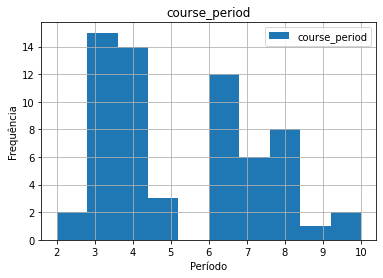

In [ ]:
axes = df_formatted.hist(column='course_period', legend=True)

for ax in axes.flatten():
    ax.set_xlabel("Período")
    ax.set_ylabel("Frequência")

Avaliando as disciplinas do curso que possuem projetos de desenvolvimento, destaca-se a escolha de Programação 2, o que está em conformidade com o perfil da maioria dos estudantes que ainda estão nas fases iniciais do curso. A disciplina com menor percentual foi a **PCOMPI** que se refere a projeto I de computação, isso pode ter ocorrido porque só houveram 2 respostas de alunos dos períodos finais, períodos esses em que a disciplina é cursada. As outras seguem uma proporção similar.

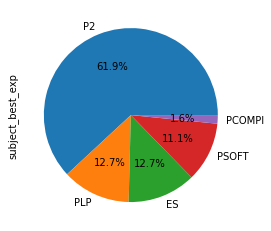

In [ ]:
df_formatted["subject_best_exp"].value_counts().plot(kind='pie', autopct='%1.1f%%')

Outro fator interessante a ser avaliado, é a participação ou não em outros projetos de desenvolvimento além daqueles construídos nas disciplinas, isso porque podem existir viéses dessas experiências e precisamos levar isso em consideração. Abaixo podemos notar que 70% dos alunos já participaram de outros projetos enquanto que 30% não.

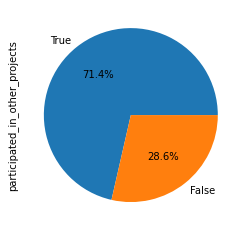

In [ ]:
df_formatted["participated_in_other_projects"].value_counts().plot(kind='pie', autopct='%1.1f%%')

No caso do fator decisivo para uma boa experiência na opinião dos avaliados, vemos que existe a predominância de trabalho bem definido e em contrapartida o de menor foi variedade de trabalho. Tentando entender os fatores que podem ter levado a esse resultado, acreditamos que esse resultado possa ter relação com o fato de que um trabalho bem definido gera maior produtividade, já que se sabe o que é esperado, ao passo que em um ambiente que possui muita diversidade de trabalho pode ser contra-produtivo em certos cenários, já que é necessário trocar de contexto mais vezes.

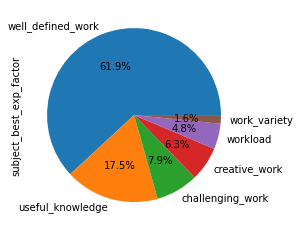

In [ ]:
df_formatted["subject_best_exp_factor"].value_counts().plot(kind='pie', autopct='%1.1f%%')

### Fatores avaliados e suas frequências


Os gráficos abaixo sumarizam o comportamento das respostas obtidas para cada fator motivacional. Nota-se que boa parte das respostas não possuem variedade, 
sendo respostas neutras ou totalmente de acordo com o fator avaliado.

Text(0, 0.5, 'Frequency')

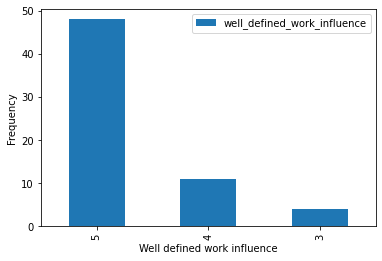

In [ ]:
ax = df_formatted["well_defined_work_influence"].value_counts().plot(kind='bar', legend=True)
ax.set_xlabel("Well defined work influence")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

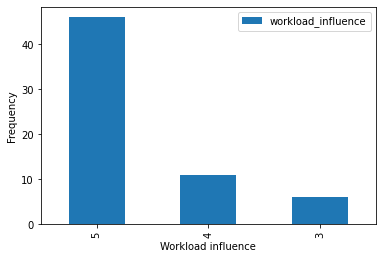

In [ ]:
ax = df_formatted["workload_influence"].value_counts().plot(kind='bar', legend=True)
ax.set_xlabel("Workload influence")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

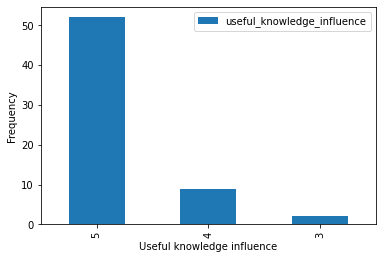

In [ ]:
ax = df_formatted["useful_knowledge_influence"].value_counts().plot(kind='bar', legend=True)
ax.set_xlabel("Useful knowledge influence")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

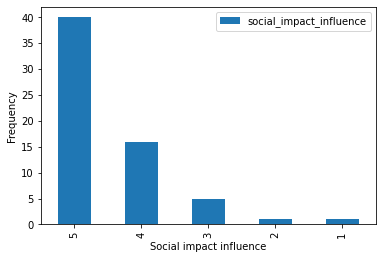

In [ ]:
ax = df_formatted["social_impact_influence"].value_counts().plot(kind='bar', legend=True)
ax.set_xlabel("Social impact influence")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

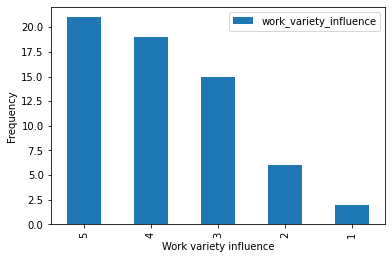

In [ ]:
ax = df_formatted["work_variety_influence"].value_counts().plot(kind='bar', legend=True)
ax.set_xlabel("Work variety influence")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

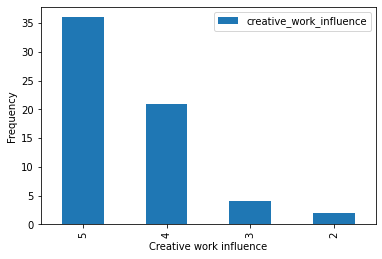

In [ ]:
ax = df_formatted["creative_work_influence"].value_counts().plot(kind='bar', legend=True)
ax.set_xlabel("Creative work influence")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

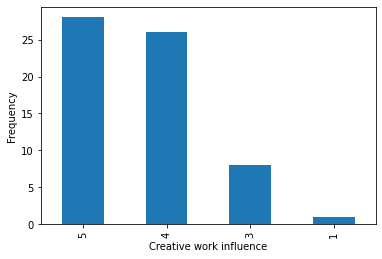

In [ ]:
ax = df_formatted["challenging_work_influence"].value_counts().plot(kind='bar')
ax.set_xlabel("Creative work influence")
ax.set_ylabel("Frequency")

### Análise da relação do período do curso com os fatores motivacionais


Como os dados coletados não apresentaram tanta variação, ao invés de utilizar um blox plot para interpretação da distribuição dos valores, bem como da inclusão de outliers, resolveu-se fazer uso de um método que descrevesse essas informações de forma quantitativa, tendo em vista que ao gerar box-plots, não era possível inferir tantas informações. 

Assim, abaixo é possível analisar a quantidade de respostas por período através do atributo **count**. A média das respostas **mean**, o desvio padrão **std**, o valor mínimo das respostas **min**, o primeiro quartil **25%**, o segundo quartil **50%**, o terceiro quartil **75%** e o valor máximo **max**. 

In [ ]:
df_formatted.groupby(['course_period'])['well_defined_work_influence'].describe() 

,count,mean,std,min,25%,50%,75%,max
course_period,,,,,,,,
2,2.0,3.500000,0.707107,3.0,3.25,3.5,3.75,4.0
3,15.0,5.000000,0.000000,5.0,5.00,5.0,5.00,5.0
4,14.0,4.500000,0.650444,3.0,4.00,5.0,5.00,5.0
5,3.0,5.000000,0.000000,5.0,5.00,5.0,5.00,5.0
6,12.0,5.000000,0.000000,5.0,5.00,5.0,5.00,5.0
7,6.0,4.833333,0.408248,4.0,5.00,5.0,5.00,5.0
8,8.0,4.375000,0.744024,3.0,4.00,4.5,5.00,5.0
9,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
10,2.0,3.500000,0.707107,3.0,3.25,3.5,3.75,4.0


In [ ]:
df_formatted.groupby(['course_period'])['workload_influence'].describe()

,count,mean,std,min,25%,50%,75%,max
course_period,,,,,,,,
2,2.0,4.000000,1.414214,3.0,3.5,4.0,4.5,5.0
3,15.0,4.733333,0.593617,3.0,5.0,5.0,5.0,5.0
4,14.0,4.428571,0.646206,3.0,4.0,4.5,5.0,5.0
5,3.0,4.666667,0.577350,4.0,4.5,5.0,5.0,5.0
6,12.0,4.916667,0.288675,4.0,5.0,5.0,5.0,5.0
7,6.0,4.833333,0.408248,4.0,5.0,5.0,5.0,5.0
8,8.0,4.500000,0.925820,3.0,4.5,5.0,5.0,5.0
9,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
10,2.0,4.000000,1.414214,3.0,3.5,4.0,4.5,5.0


In [ ]:
df_formatted.groupby(['course_period'])['useful_knowledge_influence'].describe()

,count,mean,std,min,25%,50%,75%,max
course_period,,,,,,,,
2,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
3,15.0,4.866667,0.516398,3.0,5.00,5.0,5.0,5.0
4,14.0,4.714286,0.468807,4.0,4.25,5.0,5.0,5.0
5,3.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
6,12.0,4.750000,0.621582,3.0,5.00,5.0,5.0,5.0
7,6.0,4.833333,0.408248,4.0,5.00,5.0,5.0,5.0
8,8.0,4.875000,0.353553,4.0,5.00,5.0,5.0,5.0
9,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
10,2.0,4.000000,0.000000,4.0,4.00,4.0,4.0,4.0


In [ ]:
df_formatted.groupby(['course_period'])['social_impact_influence'].describe()

,count,mean,std,min,25%,50%,75%,max
course_period,,,,,,,,
2,2.0,5.000000,0.000000,5.0,5.00,5.0,5.00,5.0
3,15.0,4.666667,0.723747,3.0,5.00,5.0,5.00,5.0
4,14.0,4.357143,0.744946,3.0,4.00,4.5,5.00,5.0
5,3.0,4.666667,0.577350,4.0,4.50,5.0,5.00,5.0
6,12.0,4.750000,0.452267,4.0,4.75,5.0,5.00,5.0
7,6.0,4.166667,1.602082,1.0,4.25,5.0,5.00,5.0
8,8.0,4.375000,0.517549,4.0,4.00,4.0,5.00,5.0
9,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
10,2.0,2.500000,0.707107,2.0,2.25,2.5,2.75,3.0


In [ ]:
df_formatted.groupby(['course_period'])['work_variety_influence'].describe()

,count,mean,std,min,25%,50%,75%,max
course_period,,,,,,,,
2,2.0,4.500000,0.707107,4.0,4.25,4.5,4.75,5.0
3,15.0,3.933333,1.279881,1.0,3.00,4.0,5.00,5.0
4,14.0,3.857143,0.770329,3.0,3.00,4.0,4.00,5.0
5,3.0,4.333333,0.577350,4.0,4.00,4.0,4.50,5.0
6,12.0,3.666667,0.778499,3.0,3.00,3.5,4.00,5.0
7,6.0,3.500000,1.760682,1.0,2.25,4.0,5.00,5.0
8,8.0,3.250000,1.388730,2.0,2.00,3.0,4.25,5.0
9,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
10,2.0,4.500000,0.707107,4.0,4.25,4.5,4.75,5.0


In [ ]:
df_formatted.groupby(['course_period'])['creative_work_influence'].describe()

,count,mean,std,min,25%,50%,75%,max
course_period,,,,,,,,
2,2.0,5.000000,0.000000,5.0,5.00,5.0,5.00,5.0
3,15.0,4.666667,0.487950,4.0,4.00,5.0,5.00,5.0
4,14.0,4.214286,0.892582,2.0,4.00,4.0,5.00,5.0
5,3.0,4.666667,0.577350,4.0,4.50,5.0,5.00,5.0
6,12.0,4.750000,0.452267,4.0,4.75,5.0,5.00,5.0
7,6.0,4.500000,0.547723,4.0,4.00,4.5,5.00,5.0
8,8.0,3.625000,1.060660,2.0,3.00,3.5,4.25,5.0
9,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
10,2.0,4.500000,0.707107,4.0,4.25,4.5,4.75,5.0


In [ ]:
df_formatted.groupby(['course_period'])['challenging_work_influence'].describe()

,count,mean,std,min,25%,50%,75%,max
course_period,,,,,,,,
2,2.0,4.000000,1.414214,3.0,3.50,4.0,4.50,5.0
3,15.0,4.400000,0.632456,3.0,4.00,4.0,5.00,5.0
4,14.0,4.357143,0.744946,3.0,4.00,4.5,5.00,5.0
5,3.0,4.333333,0.577350,4.0,4.00,4.0,4.50,5.0
6,12.0,4.083333,0.900337,3.0,3.00,4.0,5.00,5.0
7,6.0,4.666667,0.516398,4.0,4.25,5.0,5.00,5.0
8,8.0,3.875000,1.246423,1.0,4.00,4.0,4.25,5.0
9,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
10,2.0,4.000000,0.000000,4.0,4.00,4.0,4.00,4.0


## Análise da disciplina de melhor experiência

O gráfico abaixo mostra a relação dos fatores motivacionais com os períodos do curso. É possível perceber que o maior fator é o *well_defined_work*, por ter sido o fator com maior número de votos considerando todos os períodos. Ou seja, o maior fator motivacional é o trabalho bem definido, com tarefas claras e objetivas.

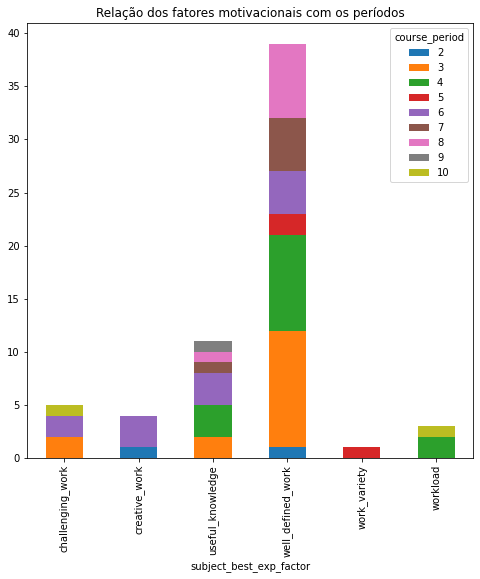

In [ ]:

table = pd.crosstab(index=df_formatted["subject_best_exp_factor"], columns=df_formatted["course_period"])
table.plot(kind="bar",figsize=(8,8),stacked=True,title='Relação dos fatores motivacionais com os períodos')

O gráfico abaixo faz uma relação das disciplinas votadas como a que oferece a melhor experiência e o principal fator para que essa experiência tenha sido boa.

Com a figura, podemos concluir que, dentre todas as disciplinas, P2 (Programação 2) é a cadeira que oferece a melhor experiência e o seu maior fator motivacional é o "Trabalho bem definido".

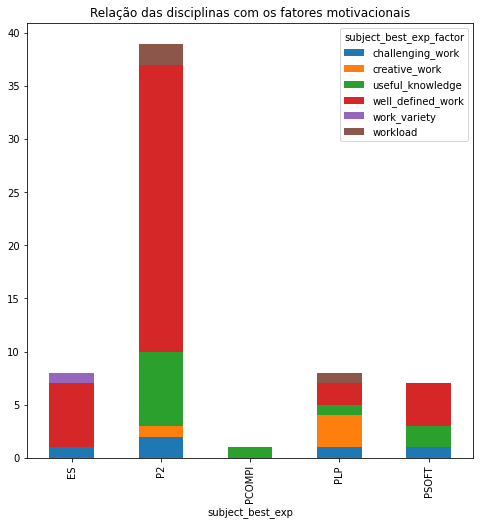

In [ ]:
table = pd.crosstab(index=df_formatted["subject_best_exp"], columns=df_formatted["subject_best_exp_factor"])
table.plot(kind="bar",figsize=(8,8),stacked=True,title='Relação das disciplinas com os fatores motivacionais')

O gráfico abaixo faz uma relação das disciplinas votadas como a que oferece a melhor experiência e o período do curso.

Vemos que a cadeira que oferece a maior experiência, considerando todos os períodos, é P2 (Programação 2). Enquanto a menos votada é PCOMPI (Projeto em Computação 1). Esse comportamento pode ser explicado pelo fato de que poucos alunos que responderam já passaram a disciplina de PCOMPI.

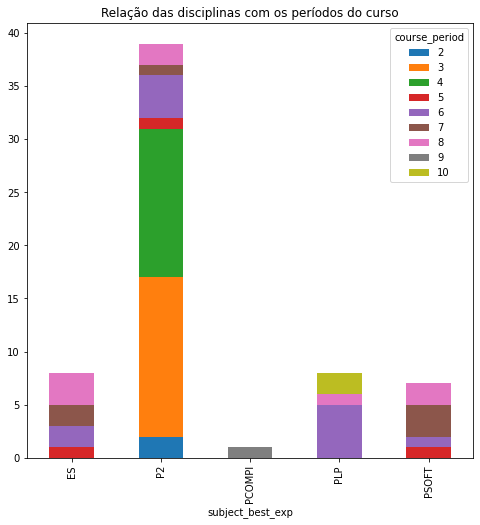

In [ ]:
table = pd.crosstab(index=df_formatted["subject_best_exp"], columns=df_formatted["course_period"])
table.plot(kind="bar",figsize=(8,8),stacked=True,title='Relação das disciplinas com os períodos do curso')

## Análise da relação da participação em outros projetos com os fatores motivacionais

Nesta seção é apresentada a análise da relação entre a participação em outros projetos com cada fator motivacional. Cada subseção é dedicada a um fator específico.

É importante observar que o número de alunos que já participaram de outros projetos é bem maior do que o número dos que não participaram, de modo que, para cada nível de influência a quantidade de votos do primeiro grupo sempre supera o segundo.

De modo geral, com as análises abaixo, é possível concluir que os maiores fatores motivacionais são o "Trabalho bem definido" e o "Conhecimento útil", pois os valores do nível em influência estão entre 3 e 5, mas o nível 5 sendo o que tem a maior quantidade de votos.

### Relação com o conhecimento útil

Com a tabela e o gráfico abaixo é possível observar que independente da participação em outros projetos, o nível de influência do "Conhecimento útil" é alto, com valores entre 3 e 5.

In [ ]:
df_formatted.groupby(['participated_in_other_projects'])['useful_knowledge_influence'].describe()

,count,mean,std,min,25%,50%,75%,max
participated_in_other_projects,,,,,,,,
False,18.0,4.888889,0.323381,4.0,5.0,5.0,5.0,5.0
True,45.0,4.755556,0.528959,3.0,5.0,5.0,5.0,5.0


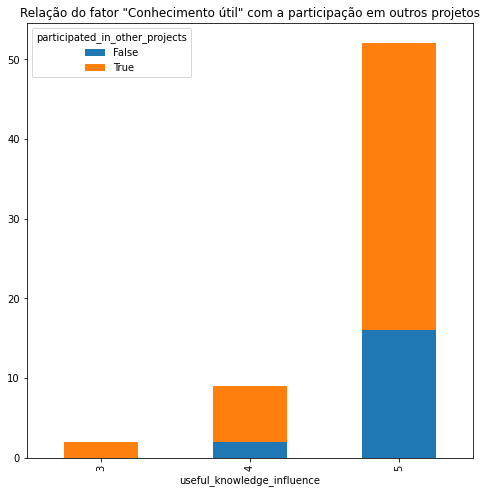

In [ ]:
table = pd.crosstab(index=df_formatted["useful_knowledge_influence"], columns=df_formatted["participated_in_other_projects"])
table.plot(kind="bar",figsize=(8,8),stacked=True,title='Relação do fator "Conhecimento útil" com a participação em outros projetos')

### Relação com trabalho bem definido

Com a tabela e o gráfico abaixo é possível observar que independente da participação em outros projetos, o nível de influência do "Trabalho bem definido" é alto, com valores entre 3 e 5.

In [ ]:
df_formatted.groupby(['participated_in_other_projects'])['well_defined_work_influence'].describe()

,count,mean,std,min,25%,50%,75%,max
participated_in_other_projects,,,,,,,,
False,18.0,4.611111,0.697802,3.0,4.25,5.0,5.0,5.0
True,45.0,4.733333,0.539360,3.0,5.00,5.0,5.0,5.0


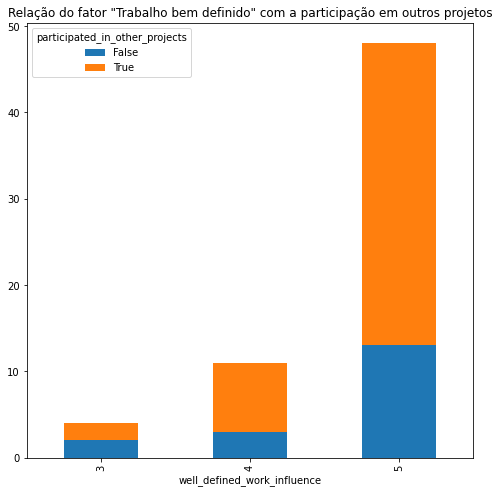

In [ ]:
table = pd.crosstab(index=df_formatted["well_defined_work_influence"], columns=df_formatted["participated_in_other_projects"])
table.plot(kind="bar",figsize=(8,8),stacked=True,title='Relação do fator "Trabalho bem definido" com a participação em outros projetos')

### Relação com o trabalho desafiador

Nesse caso nós temos um comportamento diferente dos outros fatores já citados. Pois a maior parte dos alunos que não participaram de projeto definiram o nível de influência do "Trabalho desafiador" como 4. Mas ainda sim, podemos ver que grande parte dos votos está nos níveis 4 e 5.

In [ ]:
df_formatted.groupby(['participated_in_other_projects'])['challenging_work_influence'].describe()

,count,mean,std,min,25%,50%,75%,max
participated_in_other_projects,,,,,,,,
False,18.0,4.111111,0.582983,3.0,4.0,4.0,4.0,5.0
True,45.0,4.333333,0.879049,1.0,4.0,5.0,5.0,5.0


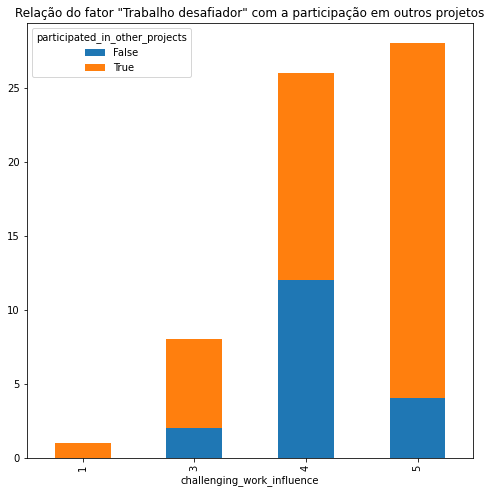

In [ ]:
table = pd.crosstab(index=df_formatted["challenging_work_influence"], columns=df_formatted["participated_in_other_projects"])
table.plot(kind="bar",figsize=(8,8),stacked=True,title='Relação do fator "Trabalho desafiador" com a participação em outros projetos')

### Relação com a variedade do trabalho

Aqui nós notamos que os todos os níveis de influência receberam votos, e que o comportamento desses votos para quem já participou ou não de outros projetos é semelhante, pois os valores dos quartis são iguais. Embora haja uma boa distribuição dos votos, os níveis que receberam mais votos é o 4 e o 5.

In [ ]:
df_formatted.groupby(['participated_in_other_projects'])['work_variety_influence'].describe()

,count,mean,std,min,25%,50%,75%,max
participated_in_other_projects,,,,,,,,
False,18.0,3.722222,1.274434,1.0,3.0,4.0,5.0,5.0
True,45.0,3.844444,1.043498,1.0,3.0,4.0,5.0,5.0


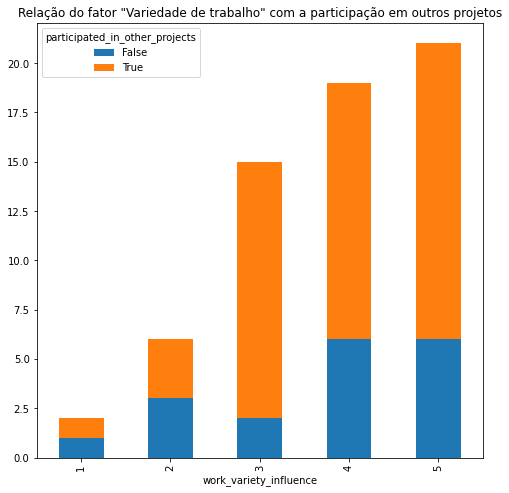

In [ ]:
table = pd.crosstab(index=df_formatted["work_variety_influence"], columns=df_formatted["participated_in_other_projects"])
table.plot(kind="bar",figsize=(8,8),stacked=True,title='Relação do fator "Variedade de trabalho" com a participação em outros projetos')

### Relação com o impacto social

Para o fator "Impacto social", todos os níveis de influência receberam votos, mas ficaram concentrados no nível 5. Vemos também que os votos dos níveis 1 e 2 foram bem baixos quando comparados aos outros, o que indica que os alunos que não consideram que o impacto social gera alguma motivação são uma exceção.

In [ ]:
df_formatted.groupby(['participated_in_other_projects'])['social_impact_influence'].describe()

,count,mean,std,min,25%,50%,75%,max
participated_in_other_projects,,,,,,,,
False,18.0,4.444444,0.921777,2.0,4.0,5.0,5.0,5.0
True,45.0,4.488889,0.815259,1.0,4.0,5.0,5.0,5.0


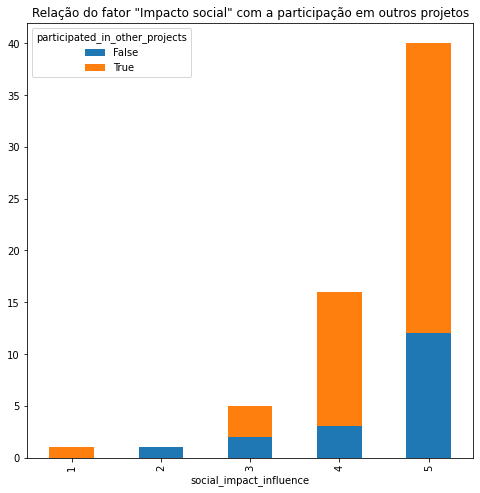

In [ ]:
table = pd.crosstab(index=df_formatted["social_impact_influence"], columns=df_formatted["participated_in_other_projects"])
table.plot(kind="bar",figsize=(8,8),stacked=True,title='Relação do fator "Impacto social" com a participação em outros projetos')

### Relação com a carga de trabalho

Para o fator "Carga de trabaho" os votos estão apenas entre 3 e 5, embora a grande concentração dos votos está no nível 5.

In [ ]:
df_formatted.groupby(['participated_in_other_projects'])['workload_influence'].describe()


,count,mean,std,min,25%,50%,75%,max
participated_in_other_projects,,,,,,,,
False,18.0,4.388889,0.777544,3.0,4.0,5.0,5.0,5.0
True,45.0,4.733333,0.579969,3.0,5.0,5.0,5.0,5.0


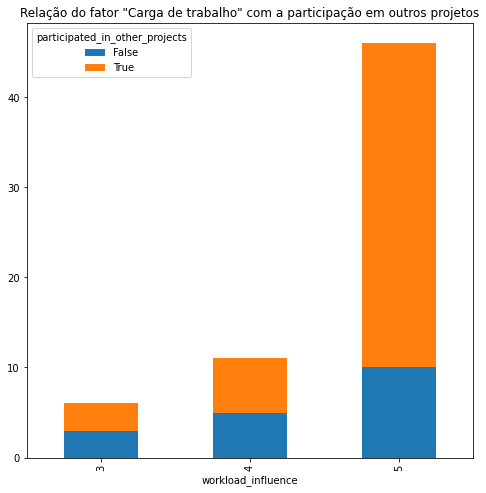

In [ ]:
table = pd.crosstab(index=df_formatted["workload_influence"], columns=df_formatted["participated_in_other_projects"])
table.plot(kind="bar",figsize=(8,8),stacked=True,title='Relação do fator "Carga de trabalho" com a participação em outros projetos')

### Relação com o trabalho criativo

Para o "Trabalho criativo" os valores também estão concentrados entre os níveis 4 e 5, embora tenhamos alguns valores para os níveis 2 e 3. Como não temos valores para o nível 1 ("Não influencia"), podemos concluir que todos os alunos consideram que o trabalho criativo gera algum impacto na motivação.

In [ ]:
df_formatted.groupby(['participated_in_other_projects'])['creative_work_influence'].describe() 


,count,mean,std,min,25%,50%,75%,max
participated_in_other_projects,,,,,,,,
False,18.0,4.333333,0.766965,2.0,4.0,4.0,5.0,5.0
True,45.0,4.488889,0.757455,2.0,4.0,5.0,5.0,5.0


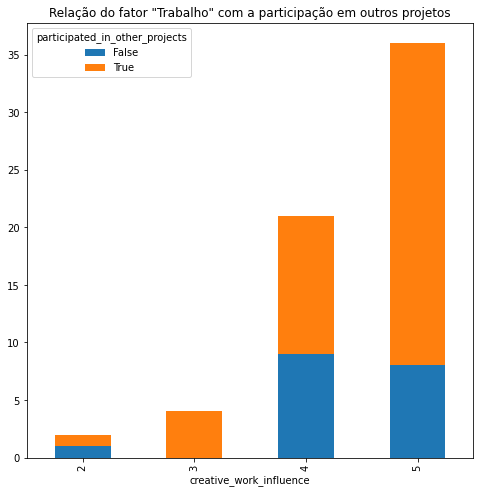

In [ ]:
table = pd.crosstab(index=df_formatted["creative_work_influence"], columns=df_formatted["participated_in_other_projects"])
table.plot(kind="bar",figsize=(8,8),stacked=True,title='Relação do fator "Trabalho" com a participação em outros projetos')

## Análise da correlação entre as variáveis

> Legenda:
> * 0.9 a 1 positivo ou negativo indica uma correlação muito forte.
> * 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
> * 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
> * 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
> * 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

* É possível observar que `well_defined_work_influence` e `workload_influence` apresentam uma correlação forte.
* É possível observar que `challenging_work_influence` e `workload_influence` apresentam uma correlação fraca.
* É possível observar que `work_variety_influence` e `creative_work_influence` apresentam uma correlação fraca.
* É possível observar que `challenging_work_influence` e `creative_work_influence` apresentam correlação fraca.  
* É possível observar que `challenging_work_influence` e `workload_influence` apresentam correlação fraca.

**Todas as demais variáveis mostram ter correlação desprezível.**

In [ ]:
corr = df_formatted.corr(method="pearson")
corr.style.background_gradient(cmap="coolwarm")

,course_period,well_defined_work_influence,workload_influence,useful_knowledge_influence,social_impact_influence,work_variety_influence,creative_work_influence,challenging_work_influence,participated_in_other_projects
course_period,1.000000,-0.165312,0.016487,-0.122444,-0.258122,-0.111209,-0.199658,-0.099173,0.213443
well_defined_work_influence,-0.165312,1.000000,0.717330,0.291068,0.165536,-0.090183,0.125252,0.277197,0.095026
workload_influence,0.016487,0.717330,1.000000,0.217969,0.115899,0.036075,0.267343,0.341774,0.239455
useful_knowledge_influence,-0.122444,0.291068,0.217969,1.000000,0.167501,-0.105580,0.078794,0.021116,-0.126351
social_impact_influence,-0.258122,0.165536,0.115899,0.167501,1.000000,0.186236,0.067640,0.045318,0.024103
work_variety_influence,-0.111209,-0.090183,0.036075,-0.105580,0.186236,1.000000,0.334072,0.257397,0.050366
creative_work_influence,-0.199658,0.125252,0.267343,0.078794,0.067640,0.334072,1.000000,0.381055,0.093541
challenging_work_influence,-0.099173,0.277197,0.341774,0.021116,0.045318,0.257397,0.381055,1.000000,0.125343
participated_in_other_projects,0.213443,0.095026,0.239455,-0.126351,0.024103,0.050366,0.093541,0.125343,1.000000


## Conclusão

Com a nossa coleta de dados não é possível afirmar se nossa hipótese se confirma, isso devido à baixa variabilidade entre os dados e a baixa correlação entre os dados. Entretanto, é possível observar uma relação entre um `trabalho bem definido` e a `baixa carga de trabalho`, algo que se mostra interessante, já que pode indicar que um trabalho com uma boa definição do que é esperado leva à redução na pressão sobre os envolvidos na atividade. 